# SPACEc: Tissue extractor

This script takes a 3D tiff or qptiff fluorescent image containing multiple tissues, crops each tissue out of the larger image, and saves a tiff subimage for each tissue. It expects images of dimension (cycles, Ypixels, Xpixels). The script is based on image segmentation principles and code presented on the scikit-image site at this link (https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html). 

The steps of the script are:

1. The image is downsized by downscale_factor in each dimension. 
2. A Gaussian filter with std. dev. equal to sigma is applied to the image to remove outliers.
3. Watershed segmentation is applied to segment the image into individual tissues.
4. (Optional) User can manually clean up tissue piece region assignments
5. A bounding box is generated around each region.
6. Each bounding box is used to crop the original full tiff stack.
7. The resulting cropped tiff stack of each region is saved as its own tiff.

In [8]:
# import spacec first
import spacec as sp

# import standard packages
import os
import warnings
import numpy as np
import scanpy as sc
import matplotlib

warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80, facecolor='white') 
# set the default color map to viridis, the below paramters can be chanaged
matplotlib.rcParams["image.cmap"] = 'viridis'

In [10]:
# Specify the path to the data
root_path = "/home/user/path/SPACEc/" # replace with your path
data_path = root_path + 'example_data/raw/' # where the data is stored

# where you want to store the output
output_dir = root_path + 'example_data/output/'
os.makedirs(output_dir, exist_ok=True)

In [11]:
# specify the image file for extraction
file = 'tonsil_tma.tif' # the file name of the image, can be qptiff or tiff
file_path = data_path + file # the path to the image

## Downscale CODEX images

Reading in the qptiff file, might take awhile!
Loaded nuclear image of dimension (Y,X) = (3139, 5865)


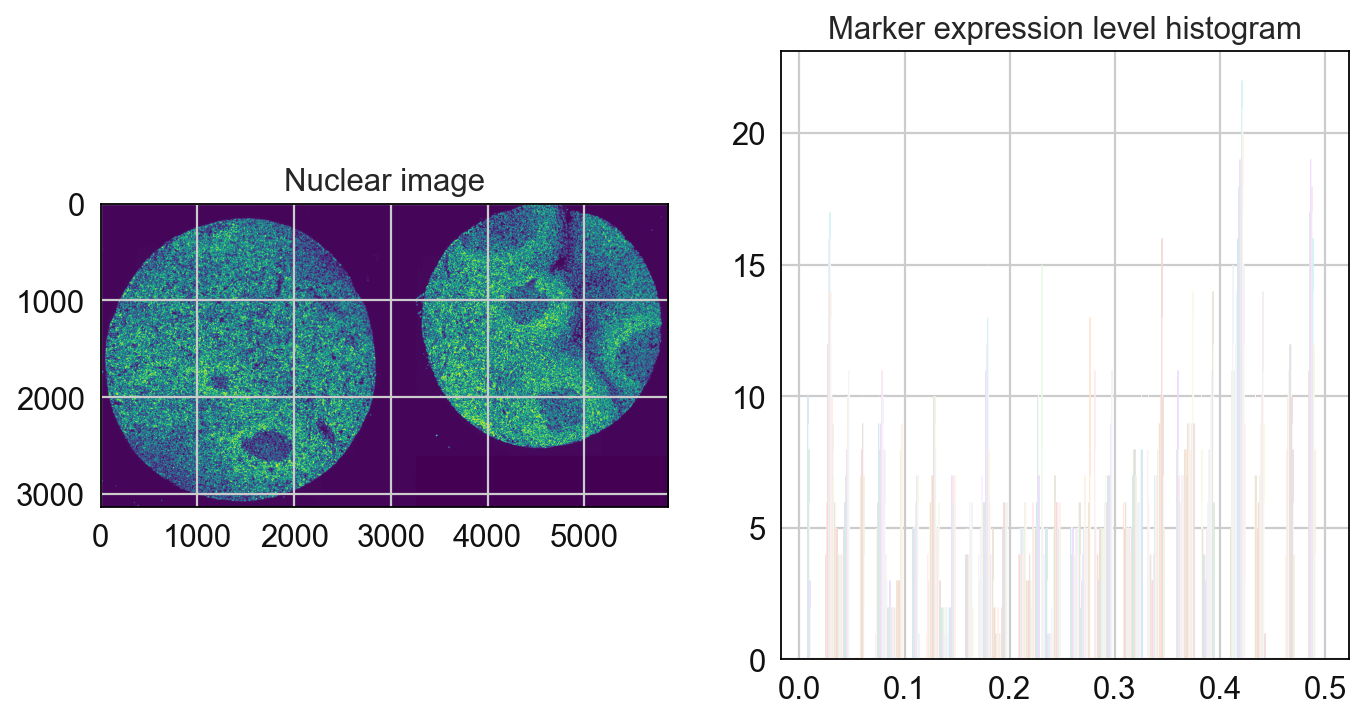

returning scaled down image!


In [12]:
# downscale your image for easy segmentation computation
resized_im = sp.hf.downscale_tissue(file_path = file_path, # where qptiff or tiff is stored
                                    downscale_factor = 64, # the downscale factor for the image
                                    padding = 50, # the padding to add to the image
                                    output_dir = output_dir # where to store the downscale image
                                    )

## Segment individual tissue pieces

Identified 2 tissue pieces


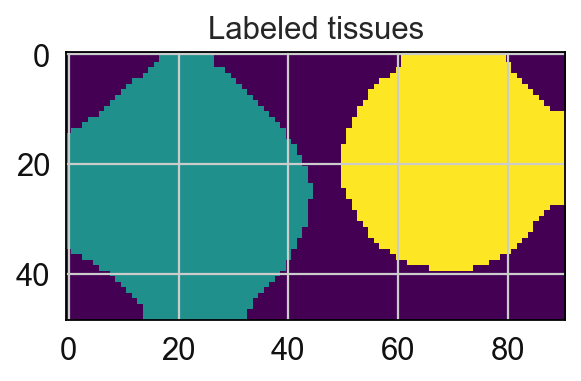

Saving the labels from the segmentation!


In [13]:
tissueframe = sp.tl.label_tissue(resized_im, # the downsampled image
                                 lower_cutoff = 0.2, #the lower cutoff of the image intensity for the tissue
                                 upper_cutoff = 0.21 #the upper cutoff of the image intensity for the tissue
                                 )

In [14]:
tissueframe.head()

,tissue,y,x,region1
0,1,0,17,1
1,1,0,18,1
2,1,0,19,1
3,1,0,20,1
4,1,0,21,1


## Rename tissue number (optional)

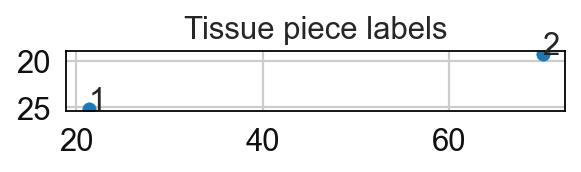

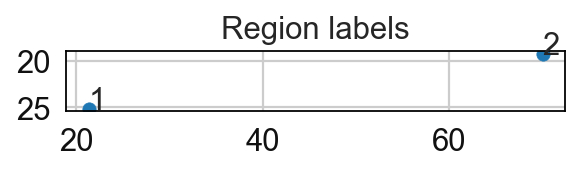

In [15]:
# Manually assign the tissue pieces to the regions
sp.pl.tissue_lables(tissueframe=tissueframe, #the data frame with pixel assignment to each tissue piece or region
                    region = 'region1')

## Extract individual labeled tissue

Reading in the qptiff file, might take awhile!


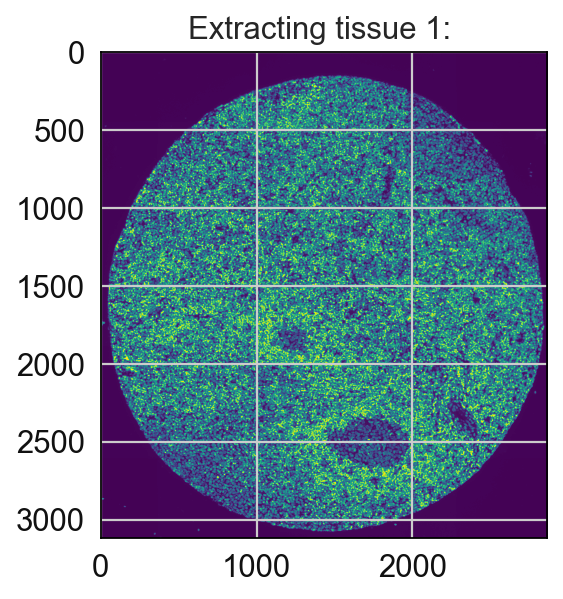

Saving tissue image at /home/tim/Dokumente/GitHub/SPACEc/example_data/output/reg001_X01_Y01_Z01.tif


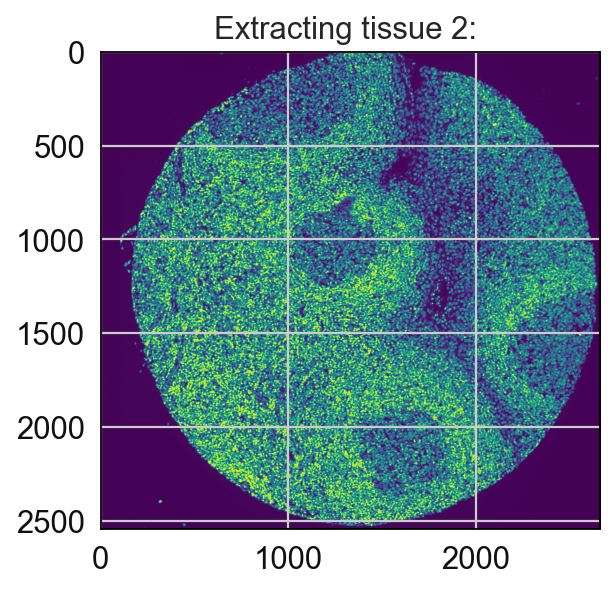

Saving tissue image at /home/tim/Dokumente/GitHub/SPACEc/example_data/output/reg002_X01_Y01_Z01.tif


In [16]:
sp.tl.save_labelled_tissue(filepath=file_path, 
                           tissueframe=tissueframe, # the data frame with pixel assignment to each tissue piece or region
                           output_dir = output_dir, # where to store the image
                           downscale_factor = 64, # the downscale factor for the image
                           region = 'region1', 
                           padding = 50 # the padding to add to the image
                           )